# Introduction

This project is all about the prediction of heart health.

# Importing Dependencies

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing data and analysing

In [48]:
# setting path 
path = './HeartDiseaseTrain-Test.csv'

In [49]:
# reading data data set
df = pd.read_csv(path)
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


about the data 

Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital)

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [51]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [78]:
# since we are not having any NaN we need to check wheather a datapoint is zero or not

def checkZero(df, col_name_list):
    print(f"list size which u are checking is: {len(col_name_list)}\n")
    for cols in col_name_list:
        if (df[cols] != 0).any():
            print(f"{cols} has no zeros")
        else:
            print(f"{cols} has zeros")
    
    return "\nDone checking the zeros in cols"


In [79]:
print(checkZero(df, ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']))

list size which u are checking is: 5

age has no zeros
resting_blood_pressure has no zeros
cholestoral has no zeros
Max_heart_rate has no zeros
oldpeak has no zeros

Done checking the zeros in cols


So in this above dataset we don't have any missing or NaN ... so we can proceed to our further step.

# EDA

<Axes: xlabel='target', ylabel='count'>

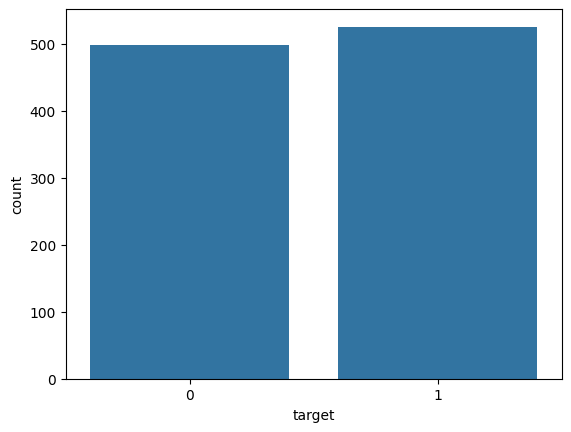

In [82]:
sns.countplot(x='target', data=df)